/home/adam/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/adam/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/adam/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/adam/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

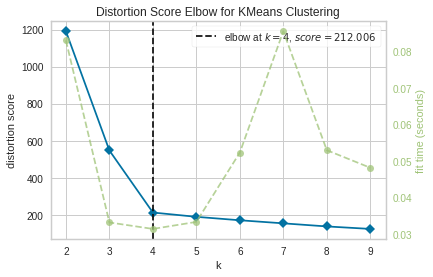

Best K: 4
Accuracy: 0.50
Confusion Matrix:
[[75  0  0  0]
 [ 0 75  0  0]
 [ 0  0  0 75]
 [ 0  0 75  0]]


/home/adam/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from yellowbrick.cluster import KElbowVisualizer

# Function to generate data and determine optimal K using the Elbow method
def generate_data_and_optimal_k():
    # Generate synthetic data
    X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    # Use Elbow method to find optimal K
    visualizer = KElbowVisualizer(KMeans(), k=(2, 10))
    visualizer.fit(X)
    visualizer.show()

    return X, y_true, visualizer.elbow_value_

# Function to perform K-Means clustering and evaluate performance
def perform_kmeans_clustering(X, y_true, best_k):
    # Fit KMeans with the optimal number of clusters
    kmeans = KMeans(n_clusters=best_k, random_state=0)
    kmeans.fit(X)
    
    # Predict cluster labels for the data
    y_predict = kmeans.predict(X)

    # Calculate accuracy
    accuracy = np.mean(y_true == y_predict)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_predict)

    return accuracy, conf_matrix

# Main function to orchestrate the process
def main():
    # Step 1: Generate data and determine the best K
    X, y_true, best_k = generate_data_and_optimal_k()

    # Step 2: Perform clustering and evaluation
    accuracy, conf_matrix = perform_kmeans_clustering(X, y_true, best_k)

    # Step 3: Output results
    print(f"Best K: {best_k}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)

# Execute the program
if __name__ == "__main__":
    main()
